In [1]:
import pandas as pd 
## load dataset 
import os
cwd = os.getcwd()
print(cwd)

/Users/jihyunshin/Desktop


In [2]:
%%html
<script src="https://livebook.dsschool.co.kr/alex/loader.js"></script>

In [3]:
cwd

'/Users/jihyunshin/Desktop'

In [4]:
os.chdir("/Users/jihyunshin/Downloads")

In [5]:
train=pd.read_csv("train.csv")

In [5]:
print(train.shape)

(878049, 9)


In [6]:
train.head

<bound method NDFrame.head of                       Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
5       2015-05-13 23:30:00           LARCENY/THEFT   
6       2015-05-13 23:30:00           VEHICLE THEFT   
7       2015-05-13 23:30:00           VEHICLE THEFT   
8       2015-05-13 23:00:00           LARCENY/THEFT   
9       2015-05-13 23:00:00           LARCENY/THEFT   
10      2015-05-13 22:58:00           LARCENY/THEFT   
11      2015-05-13 22:30:00          OTHER OFFENSES   
12      2015-05-13 22:30:00               VANDALISM   
13      2015-05-13 22:06:00           LARCENY/THEFT   
14      2015-05-13 22:00:00            NON-CRIMINAL   
15      2015-05-13 22:00:00            NON-CRIMINAL   
16      2015-05-13 22:00:00        

In [9]:
%matplotlib inline

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [11]:
## Dates
train["Dates"]=pd.to_datetime(train["Dates"])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [13]:
train["Dates-year"]=train["Dates"].dt.year
train["Dates-month"]=train["Dates"].dt.month
train["Dates-day"]=train["Dates"].dt.day
train["Dates-hour"]=train["Dates"].dt.hour
train["Dates-minute"]=train["Dates"].dt.minute
train["Dates-second"]=train["Dates"].dt.second

In [14]:
print(train.shape)

(878049, 15)


In [15]:
train[["Dates","Dates-year","Dates-month","Dates-day","Dates-hour","Dates-minute","Dates-second"]].head()

,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


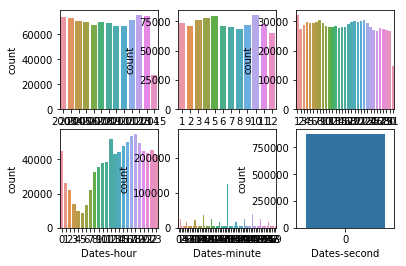

In [16]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

In [17]:
## 1) Dates-second variable can be eliminated from analysis. 
## 2) Dates-hour variable important for the analysis.
## 3) Dates-day variable concentrated on 1st maybe because incidents whose dates are unknown are counted as 1st?

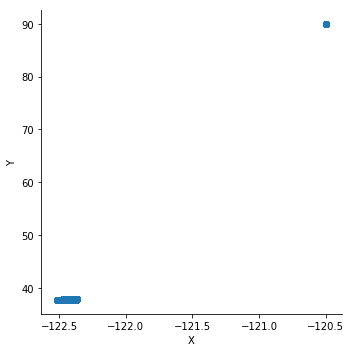

In [18]:
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

In [19]:
# Outlier in the high values of X and Y
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [20]:
x_outliers= (train["X"]==train["X"].max())
y_outliers= (train["Y"]==train["Y"].max())

In [ ]:
train[x_outliers]

In [21]:
outlier=train[x_outliers & y_outliers]

In [22]:
print(outlier.shape)

(67, 15)


In [23]:
outlier

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,0


In [24]:
non_outliers=train[~(x_outliers & y_outliers)]

In [ ]:
sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

In [ ]:
### DayOfWeek
# Predictions
# 1) There will be more crime incidents during the week days than during the weekends
# 2) More crime incidents on Mondays than any other days
# 3) Saturday and Sunday should look similar.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 15 columns):
Dates           878049 non-null datetime64[ns]
Category        878049 non-null object
Descript        878049 non-null object
DayOfWeek       878049 non-null object
PdDistrict      878049 non-null object
Resolution      878049 non-null object
Address         878049 non-null object
X               878049 non-null float64
Y               878049 non-null float64
Dates-year      878049 non-null int64
Dates-month     878049 non-null int64
Dates-day       878049 non-null int64
Dates-hour      878049 non-null int64
Dates-minute    878049 non-null int64
Dates-second    878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 100.5+ MB


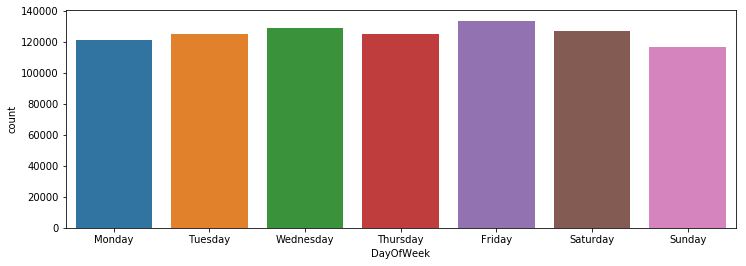

In [26]:
plt.figure(figsize=(12,4))
dayofweek_list=("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
sns.countplot(data=train, x="DayOfWeek", order=dayofweek_list)

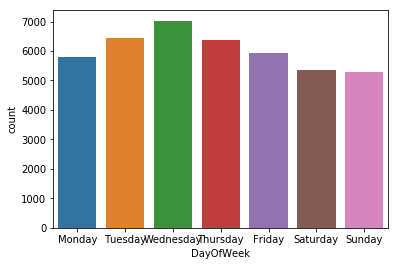

In [27]:
target=train[train["Category"]=="WARRANTS"]
sns.countplot(data=target, x="DayOfWeek", order=dayofweek_list)

In [ ]:
train

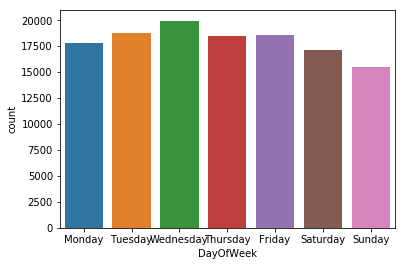

In [28]:
target=train[train["Category"]=="OTHER OFFENSES"]
sns.countplot(data=target, x="DayOfWeek", order=dayofweek_list)

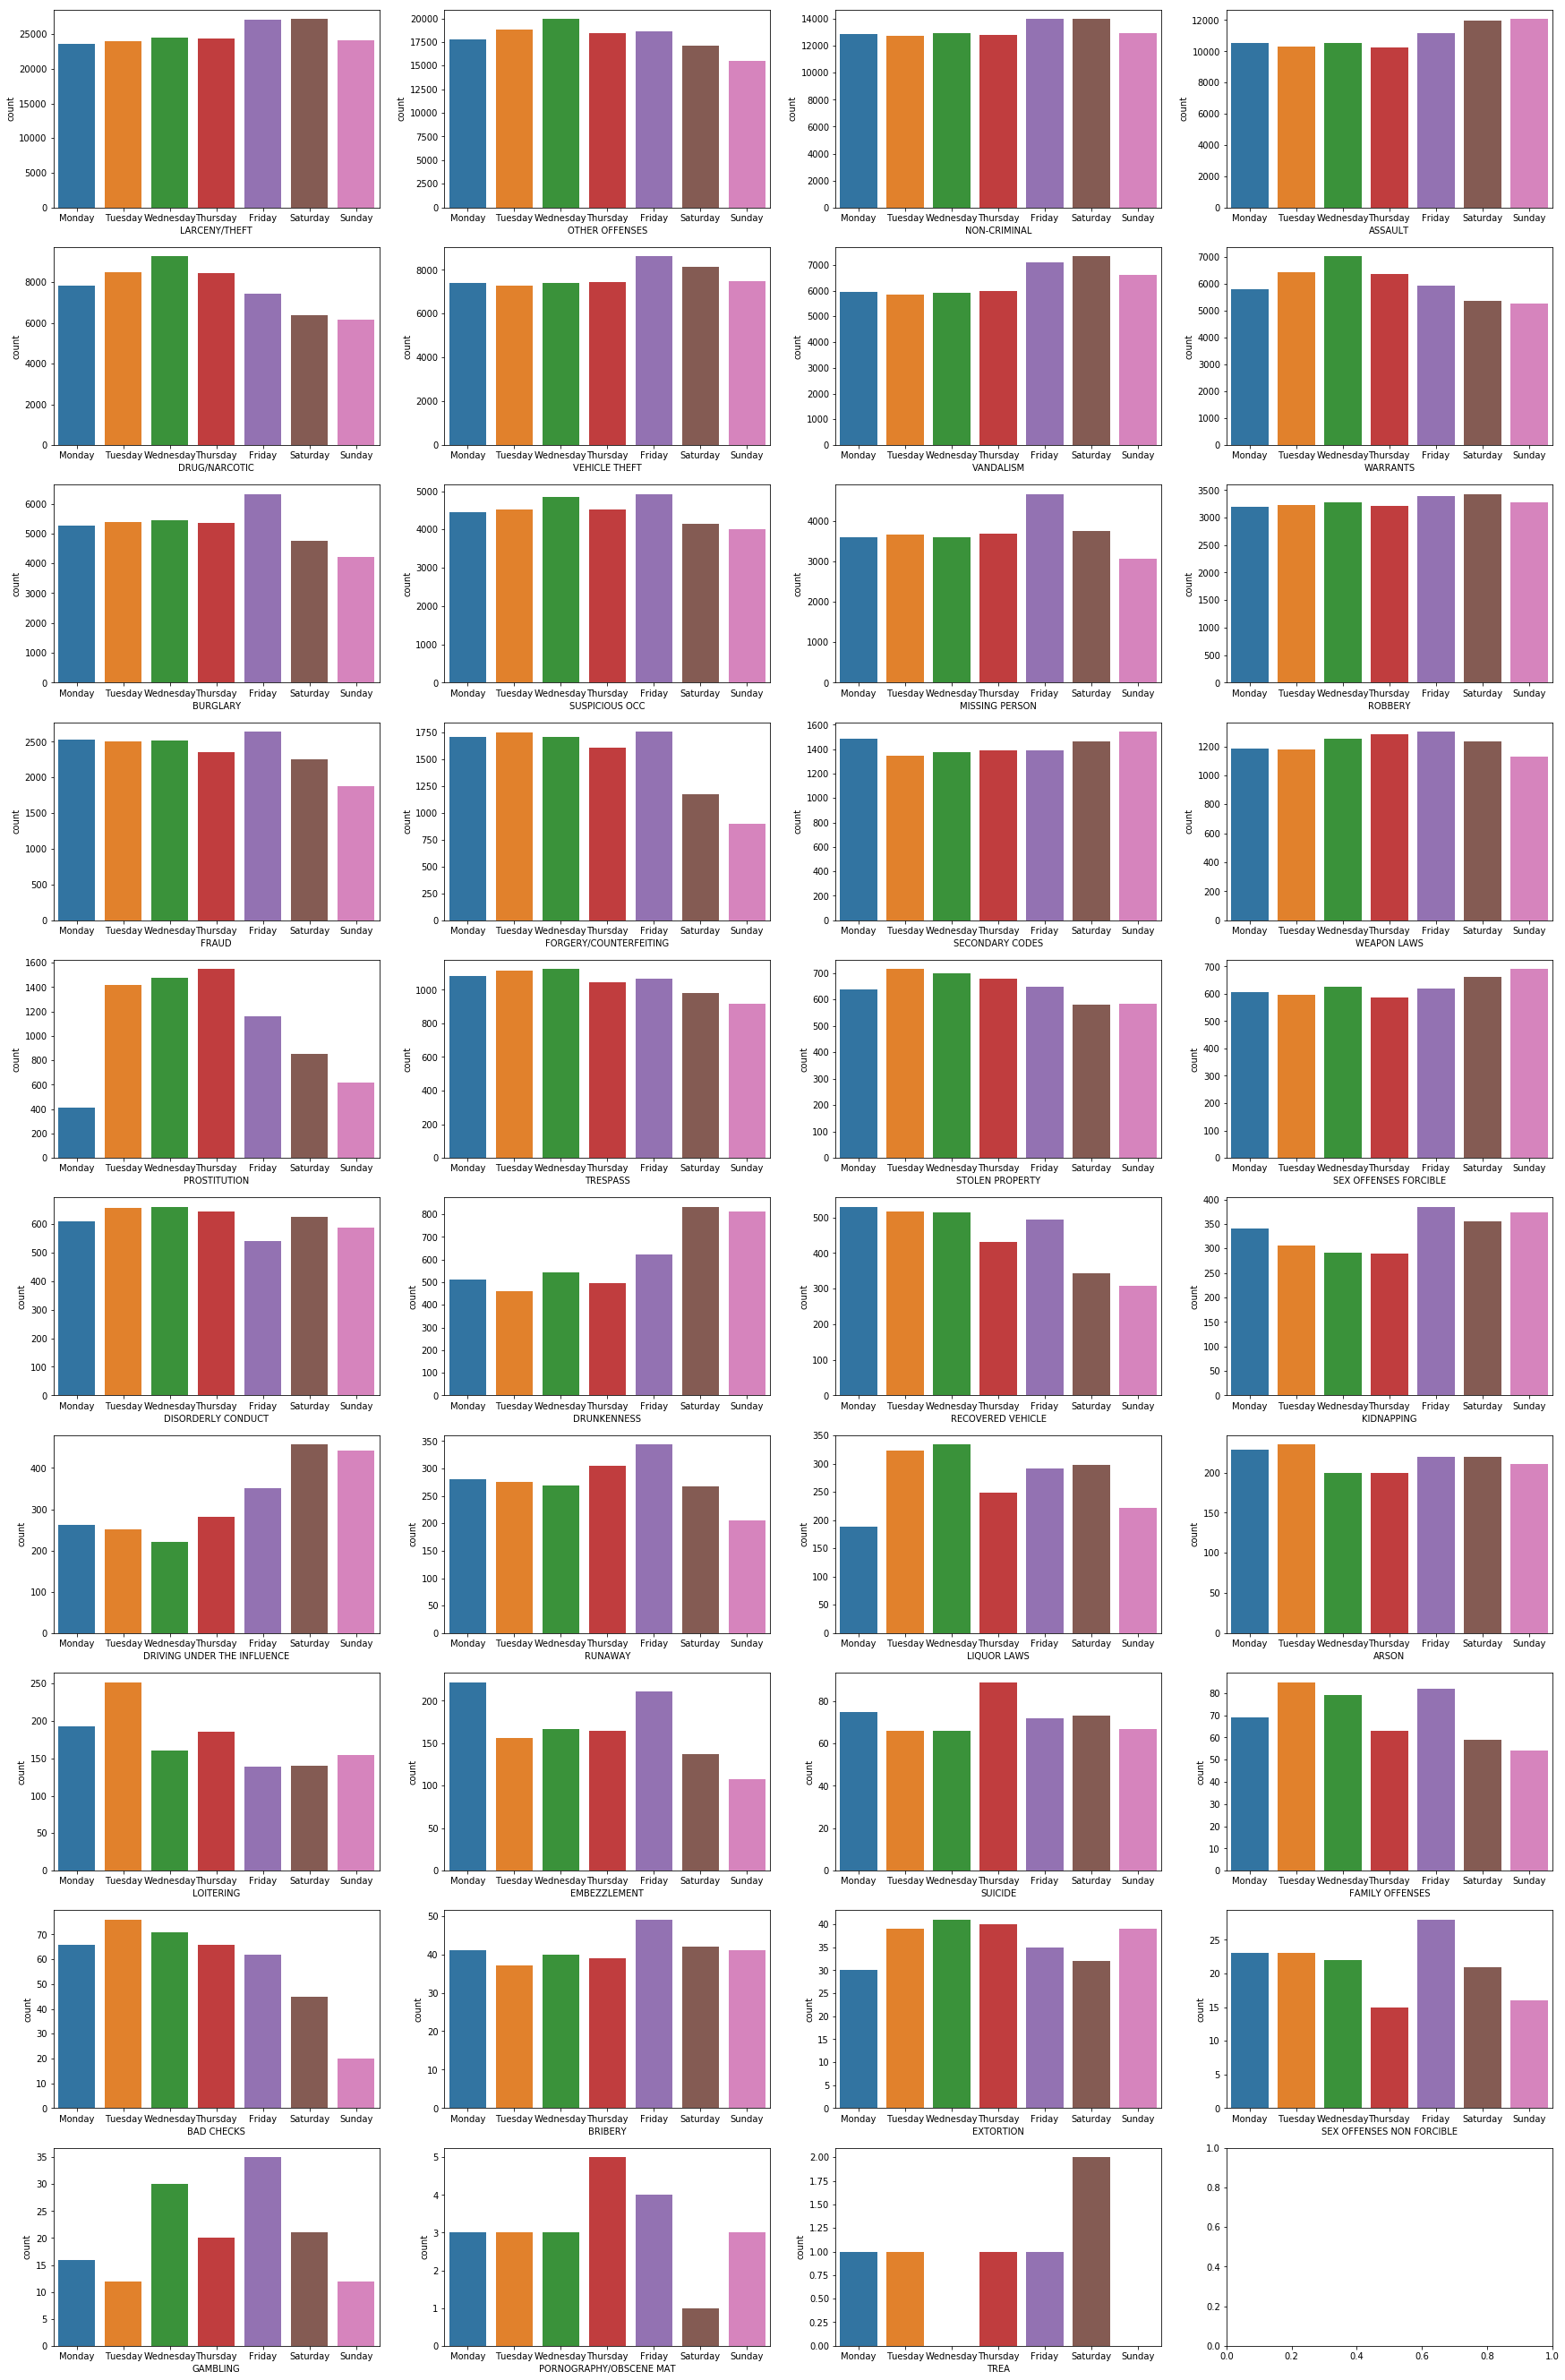

In [29]:
figure, axes=plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(30,48)

category_list=train["Category"].value_counts().index
category_list

for row in range(10):
    for column in range(4):
        index=row*4+column
        
        if index<len(category_list):
            ax=axes[row][column]
            
            category=category_list[index]
            
            target=train[train["Category"]==category]
            sns.countplot(data=target, x="DayOfWeek", order=dayofweek_list, ax=ax)
            
            ax.set(xlabel=category)
#             print(row, column,index, category)
#           print(row, column, index, category)
            
            
#         if index<len(category_list):
#             ax=axes[row][column]
#             category=category_list[index]
            
#             


# ax=axes[0][0]
# category="WARRANTS"
# target=train[train["Category"]== category]
# sns.countplot(data=target, x="DayOfWeek", order=dayofweek_list, ax=ax)

# ax.set(xlabel=category)

# ax=axes[0][1]
# category="OTHER OFFENSES"
# target=train[train["Category"]=="OTHER OFFENSES"]
# sns.countplot(data=target, x="DayOfWeek", order=dayofweek_list, ax=ax)

# ax.set(xlabel=category)

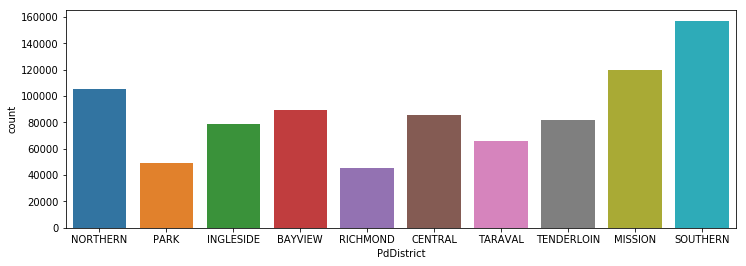

In [30]:
## PdDistrict
plt.figure(figsize=(12,4))
sns.countplot(data=train, x="PdDistrict")

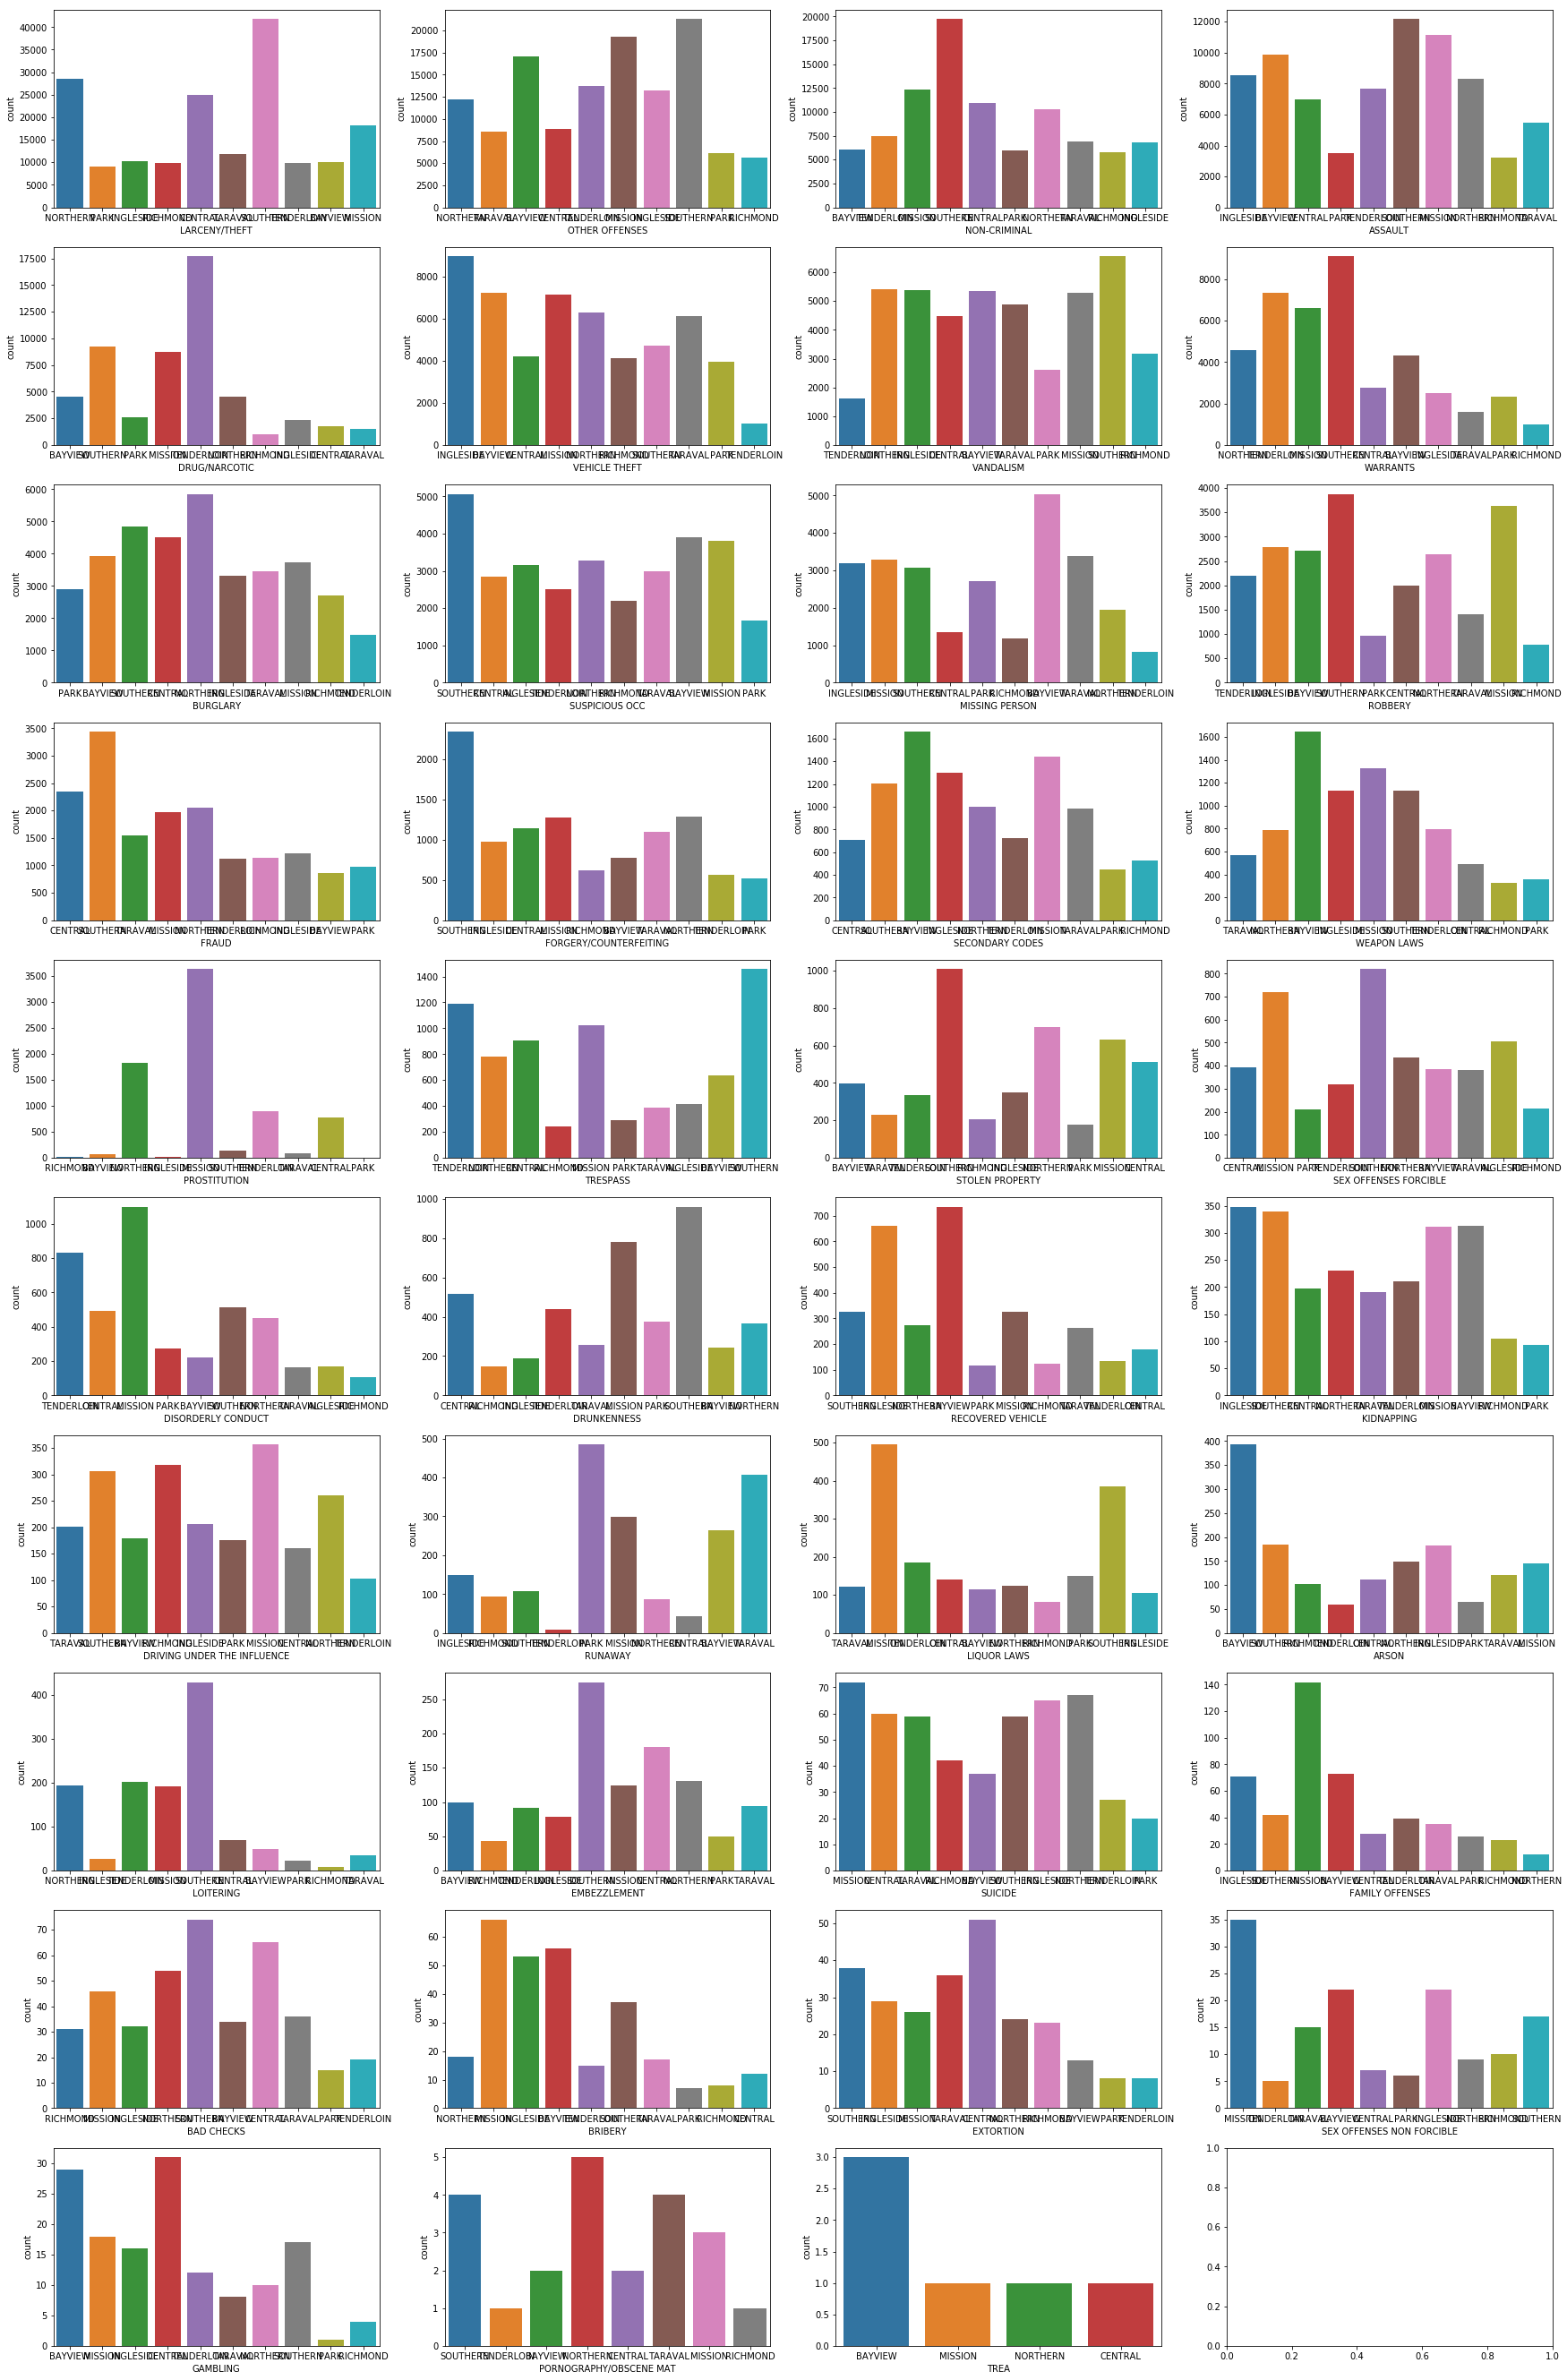

In [31]:
figure, axes=plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(30,48)

category_list=train["Category"].value_counts().index
category_list

for row in range(10):
    for column in range(4):
        index=row*4+column
        
        if index<len(category_list):
            ax=axes[row][column]
            
            category=category_list[index]
            
            target=train[train["Category"]==category]
            sns.countplot(data=target, x="PdDistrict",  ax=ax)
            
            ax.set(xlabel=category)

In [6]:
##################
##################
###Reload Dataset
##################
##################
train=pd.read_csv("train.csv")

In [9]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
test=pd.read_csv("test.csv", index_col="Id")

In [8]:
print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [10]:
## Train
feature_names = ["X","Y"]
feature_names

['X', 'Y']

In [11]:
#feature_names
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(878049, 2)


,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


In [12]:
X_test=test[feature_names]

In [13]:
print(X_test.shape)
X_test.head()

(884262, 2)


,X,Y
Id,,
0,-122.399588,37.735051
1,-122.391523,37.732432
2,-122.426002,37.792212
3,-122.437394,37.721412
4,-122.437394,37.721412


In [14]:
label_name="Category"
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [15]:
# Now we have X_train, X_test, Y_train
### Use Random Forest 

from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,
                             n_jobs=-1,
                             random_state=37
                            )
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=37, verbose=0, warm_start=False)

In [16]:
## Evaluate:Hold-out validation

from sklearn.model_selection import train_test_split

X_train_kf, X_test_kf, y_train_kf, y_test_kf=train_test_split(X_train, y_train, 
                                                              test_size=0.3,
                                                             random_state=37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(614634, 2) (614634,)
(263415, 2) (263415,)


In [17]:
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 25.4 s, sys: 670 ms, total: 26.1 s
Wall time: 9.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=37, verbose=0, warm_start=False)

In [18]:
y_test_predict_kf=model.predict_proba(X_test_kf)
print(y_test_predict_kf.shape)
y_test_predict_kf

(263415, 39)


array([[0.00141981, 0.07261694, 0.00051346, ..., 0.00488992, 0.06382229,
        0.00567947],
       [0.        , 0.07913212, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07539436, 0.        , ..., 0.12601479, 0.        ,
        0.        ],
       ...,
       [0.        , 0.12157551, 0.        , ..., 0.10717029, 0.02769445,
        0.01195696],
       [0.        , 0.        , 0.        , ..., 0.25690476, 0.        ,
        0.        ],
       [0.        , 0.07748807, 0.        , ..., 0.01098782, 0.03722328,
        0.        ]])

In [19]:
from sklearn.metrics import log_loss

score=log_loss(y_test_kf, y_test_predict_kf)
print("Log Loss = {:.5f}".format(score))

Log Loss = 6.27288


In [25]:
## Predict 

In [26]:
%time model.fit(X_train, y_train)

CPU times: user 35.3 s, sys: 1.04 s, total: 36.3 s
Wall time: 12.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=37, verbose=0, warm_start=False)

In [27]:
prediction_list=model.predict_proba(X_test)
print(prediction_list.shape)
prediction_list

(884262, 39)


array([[0.        , 0.08809825, 0.        , ..., 0.22377007, 0.14240867,
        0.        ],
       [0.        , 0.10375124, 0.        , ..., 0.06407299, 0.09414945,
        0.01365225],
       [0.        , 0.0827316 , 0.        , ..., 0.19073219, 0.        ,
        0.        ],
       ...,
       [0.        , 0.14340178, 0.        , ..., 0.15787203, 0.032328  ,
        0.        ],
       [0.        , 0.0991478 , 0.        , ..., 0.05361619, 0.        ,
        0.05875233],
       [0.00307341, 0.05088835, 0.00060181, ..., 0.01757337, 0.05365104,
        0.00401779]])

In [49]:
sample_submission=pd.read_csv("sampleSubmission.csv", index_col="Id")
submission=pd.DataFrame(prediction_list,
                       index=sample_submission.index,
                       columns=model.classes_)
print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.088098,0.0,0.0,0.000000,0.000000,0.000000,0.032852,0.00000,0.029211,...,0.0,0.00000,0.0,0.095305,0.0,0.000000,0.152210,0.223770,0.142409,0.000000
1,0.0,0.103751,0.0,0.0,0.000000,0.000000,0.004104,0.052227,0.00000,0.000000,...,0.0,0.00000,0.0,0.025692,0.0,0.002606,0.007048,0.064073,0.094149,0.013652
2,0.0,0.082732,0.0,0.0,0.224696,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.00000,0.0,0.062187,0.0,0.000000,0.138730,0.190732,0.000000,0.000000
3,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349
4,0.0,0.208781,0.0,0.0,0.036316,0.022939,0.012555,0.048533,0.00906,0.000000,...,0.0,0.00836,0.0,0.051164,0.0,0.000000,0.086190,0.000000,0.070167,0.052349


In [ ]:
model.classes_

In [50]:
submission.to_csv("baseline-script.csv")

In [4]:
cwd

NameError: name 'cwd' is not defined

In [20]:
################
## Preprocessing
################

## Dates ## 
train = pd.read_csv("train.csv")

train["Dates"]=pd.to_datetime(train["Dates"])

In [21]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [22]:
test = pd.read_csv("test.csv", index_col = "Id")
print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [23]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [24]:
test["Dates"] = pd.to_datetime(test["Dates"])
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 12)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
Id,,,,,,,
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


In [25]:
## Day of Week ## 

dayofweek_list=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

for dayofweek in dayofweek_list:
    column="DayOfWeek_"+ dayofweek 
    train[column]=train["DayOfWeek"]==dayofweek
  


# train["DayOfWeek_Monday"] = train["DayOfWeek"]=="Monday"
# train["DayOfWeek_Tuesday"] = train["DayOfWeek"]=="Tuesday"
# train["DayOfWeek_Wednesday"] = train["DayOfWeek"]=="Wednesday"
# train["DayOfWeek_Thursday"] = train["DayOfWeek"]=="Thursday"
# train["DayOfWeek_Friday"] = train["DayOfWeek"]=="Friday"
# train["DayOfWeek_Saturday"] = train["DayOfWeek"]=="Saturday"
# train["DayOfWeek_Sunday"] = train["DayOfWeek"]=="Sunday"

print(train.shape)
train.head()

(878049, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,False,False,True,False,False,False,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,False,False,True,False,False,False,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,False,False,True,False,False,False,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,False,False,True,False,False,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,False,False,True,False,False,False,False


In [26]:
# Or, one hot encoding function from pandas
# train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix="DayOfWeek")
# # concat==concatenate
# train=pd.concat([train,train_dayofweek], axis=1)
# print(train.shape)
# train.head()

In [27]:
# test data
dayofweek_list=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

for dayofweek in dayofweek_list:
    column="DayOfWeek_"+ dayofweek 
    test[column]=test["DayOfWeek"]==dayofweek
  


# train["DayOfWeek_Monday"] = train["DayOfWeek"]=="Monday"
# train["DayOfWeek_Tuesday"] = train["DayOfWeek"]=="Tuesday"
# train["DayOfWeek_Wednesday"] = train["DayOfWeek"]=="Wednesday"
# train["DayOfWeek_Thursday"] = train["DayOfWeek"]=="Thursday"
# train["DayOfWeek_Friday"] = train["DayOfWeek"]=="Friday"
# train["DayOfWeek_Saturday"] = train["DayOfWeek"]=="Saturday"
# train["DayOfWeek_Sunday"] = train["DayOfWeek"]=="Sunday"

print(test.shape)
test.head()

(884262, 19)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
Id,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,False,False,False,False,False,False,True
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,False,False,False,False,False,False,True
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,False,False,False,False,False,False,True
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,False,False,False,False,False,False,True
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,False,False,False,False,False,False,True


In [28]:
### PDdistrict ##
# train data
train_pddistrict = pd.get_dummies(train["PdDistrict"], prefix="PdDistrict")
# concat==concatenate
train=pd.concat([train,train_pddistrict], axis=1)
print(train.shape)
train.head()


(878049, 32)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# test data
test_pddistrict = pd.get_dummies(test["PdDistrict"], prefix="PdDistrict")
# concat==concatenate
test=pd.concat([test,test_pddistrict], axis=1)
print(test.shape)
test.head()

(884262, 29)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,...,1,0,0,0,0,0,0,0,0,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,...,1,0,0,0,0,0,0,0,0,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,0,0,1,0,0,0,0,0,0,0
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,0,0,1,0,0,0,0,0,0,0


In [30]:
## Features
feature_names = ["X","Y"]

feature_names=feature_names+["Dates-year","Dates-month","Dates-day","Dates-hour",
                             "Dates-minute","Dates-second"]

feature_names=feature_names+["DayOfWeek_Monday","DayOfWeek_Tuesday","DayOfWeek_Wednesday",
                             "DayOfWeek_Thursday","DayOfWeek_Friday","DayOfWeek_Saturday","DayOfWeek_Sunday"] 

feature_names = feature_names + list(train_pddistrict.columns)
feature_names


['X',
 'Y',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute',
 'Dates-second',
 'DayOfWeek_Monday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Friday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [31]:
feature_names + list(train_pddistrict.columns)

['X',
 'Y',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute',
 'Dates-second',
 'DayOfWeek_Monday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Friday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [32]:
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(878049, 25)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Monday,DayOfWeek_Tuesday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,2015,5,13,23,53,0,False,False,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,2015,5,13,23,53,0,False,False,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,2015,5,13,23,33,0,False,False,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,2015,5,13,23,30,0,False,False,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,2015,5,13,23,30,0,False,False,...,0,0,0,0,0,1,0,0,0,0


In [33]:
label_name="Category"
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [34]:
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(884262, 25)


,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Monday,DayOfWeek_Tuesday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,-122.399588,37.735051,2015,5,10,23,59,0,False,False,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,2015,5,10,23,51,0,False,False,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,2015,5,10,23,50,0,False,False,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,2015,5,10,23,45,0,False,False,...,0,0,1,0,0,0,0,0,0,0


In [35]:
## Gradient Boosting Machine Learning (LGBM)
!conda install -c conda-forge -y lightgbm

Solving environment: done

# All requested packages already installed.



In [36]:
from lightgbm import LGBMClassifier

/Users/jihyunshin/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [37]:
model=LGBMClassifier(n_estimators=10,
                     random_state=37)

In [1]:


from sklearn.model_selection import train_test_split

X_train_kf, X_test_kf, y_train_kf, y_test_kf=train_test_split(X_train, y_train, 
                                                              test_size=0.3,
                                                             random_state=37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

NameError: name 'X_train' is not defined

In [ ]:
y_predict_test_kf = model.predict_proba(X_test_kf)
print(y_predict_test_kf.shape)
y_predict_test_kf

from sklearn.metrics import log_loss
score = log_loss(y_test_kf, y_predict_test_kf)

print(f"Score = {score:.5f}")

## Predict
%time model.fit(X_train, y_train)
prediction_list = model.predict_proba(X_test)
print(prediction_list.shape)
prediction_list


## Submission
sample_submission = pd.read_csv("sampleSubmission.csv", index_col = "Id")
submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)
print(submission.shape)
submission.head()
submission.to_csv("baseline-script.csv")

In [1]:
############
## Log Loss
############
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/Users/jihyunshin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


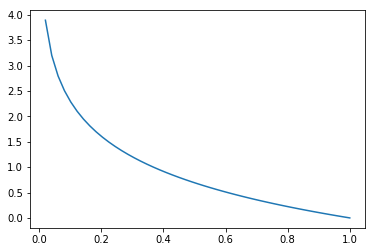

In [4]:
xx=np.linspace(start=0.0, stop=1.0)
yy= -np.log(xx)

plt.plot(xx,yy)

In [13]:
actual=np.array([1,0,0])
predict=np.array([0.9,0.2,0.3])

np.sum((-1.0 * actual * np.log(predict)) /1)


0.10536051565782628

In [31]:
# Another example
actual = [
    [1,0,0],
    [0,0,1],
    [0,1,0]
]
actual=np.array(actual)


predict=[
    [0.5, 0.2, 0,3],
    [0.2, 0.2, 0.6],
    [0.2, 0.7, 0.1],
]
predict=np.array(predict)

np.sum((-1.0 * actual* np.log(predict))/len(actual))


AttributeError: 'list' object has no attribute 'log'

In [29]:
import pandas as pd 
## load dataset 
import os

print(cwd)
os.chdir("/Users/jihyunshin/Downloads")
train=pd.read_csv("train.csv")

/Users/jihyunshin/Desktop


In [30]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [33]:
train["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [34]:
train["Category(predict)"]= train["Category"].copy()
print(train.shape)
train[["Category", "Category(predict)"]].head()

(878049, 10)


,Category,Category(predict)
0,WARRANTS,WARRANTS
1,OTHER OFFENSES,OTHER OFFENSES
2,OTHER OFFENSES,OTHER OFFENSES
3,LARCENY/THEFT,LARCENY/THEFT
4,LARCENY/THEFT,LARCENY/THEFT


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
encoder.fit(train["Category"])

actual=encoder.transform(train["Category"])
actual


array([37, 21, 21, ..., 16, 35, 12])

In [36]:
predict=encoder.transform(train["Category(predict)"])
predict

array([37, 21, 21, ..., 16, 35, 12])

In [37]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
predict=np.eye(39)[predict]
predict

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.metrics import log_loss
log_loss(actual,predict)

3.881903860748282e-14

In [42]:
train.loc[train["Category"]=="TREA","Category(predict)"] = "LARCENY/THEFT"
train.loc[train["Category"] == "TREA", ["Category","Category(predict)"] ]

,Category,Category(predict)
21002,TREA,LARCENY/THEFT
93716,TREA,LARCENY/THEFT
107733,TREA,LARCENY/THEFT
192190,TREA,LARCENY/THEFT
316490,TREA,LARCENY/THEFT
337880,TREA,LARCENY/THEFT
